In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [49]:
lyrics = pd.read_csv('../data/lyrics.csv')

In [50]:
lyrics

,Unnamed: 0,artist,title,full_title,lyrics,release_date
0,0,T.I.,About The Money,About The Money by T.I. (Ft. Young Thug),"[Intro: Young Thug, Skooly & T.I.]\n(We got Lo...",2014-06-03
1,1,T.I.,Memories Back Then,"Memories Back Then by T.I. (Ft. B.o.B, Kendric...","[Verse 1: T.I.]\nAyy, in my apartment a long t...",2013-09-18
2,2,T.I.,No Mediocre,No Mediocre by T.I. (Ft. Iggy Azalea),"[Hook: T.I.]\nAll I fuck bad bitches, I don't ...",2014-06-17
3,3,T.I.,That’s All She Wrote,That's All She Wrote by T.I. (Ft. Eminem),[Chorus 1: T.I.]\nNow I don’t really care what...,2010-12-07
4,4,T.I.,Live Your Life,Live Your Life by T.I. (Ft. Rihanna),"[Sample (over intro)]\nMiya hee, miya ho, miya...",2008-09-23
...,...,...,...,...,...,...
1580,5,"Tyler, The Creator",911 / Mr. Lonely,"911 / Mr. Lonely by Tyler, The Creator (Ft. Fr...","[Part I: 911]\n\n[Intro: Tyler, The Creator]\n...",2017-06-30
1581,6,"Tyler, The Creator",Who Dat Boy,"Who Dat Boy by Tyler, The Creator (Ft. A$AP Ro...","[Verse 1: Tyler, The Creator]\nYo, who dat boy...",2017-06-29
1582,7,"Tyler, The Creator",NEW MAGIC WAND,"NEW MAGIC WAND by Tyler, The Creator",[Intro: Jerrod Carmichael]\nSometimes you gott...,2019-05-17
1583,8,"Tyler, The Creator",Tron Cat,"Tron Cat by Tyler, The Creator","[Intro]\nLa, la, la, la, la, la, la\nAAAAHHH!\...",2011-05-10


In [51]:
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585 entries, 0 to 1584
Data columns (total 6 columns):
Unnamed: 0      1585 non-null int64
artist          1585 non-null object
title           1585 non-null object
full_title      1585 non-null object
lyrics          1585 non-null object
release_date    1507 non-null object
dtypes: int64(1), object(5)
memory usage: 74.4+ KB


In [52]:
lyrics['release_date'] = pd.to_datetime(lyrics['release_date'])

In [53]:
lyrics['lyrics'] = lyrics['lyrics'].str.replace('[', '')
lyrics['lyrics'] = lyrics['lyrics'].str.replace('\n',' ')
lyrics['lyrics'] = lyrics['lyrics'].str.replace('Intro','')
lyrics['lyrics'] = lyrics['lyrics'].str.replace(':','')
lyrics['lyrics'] = lyrics['lyrics'].str.replace('Verse','')
lyrics['lyrics'] = lyrics['lyrics'].str.replace('Hook','')
lyrics['lyrics'] = lyrics['lyrics'].str.replace('Chorus','')
lyrics['lyrics'] = lyrics['lyrics'].str.replace('Sample','')
lyrics['lyrics'] = lyrics['lyrics'].str.replace('intro','')
lyrics['lyrics'] = lyrics['lyrics'].str.replace(',','')
lyrics['lyrics'] = lyrics['lyrics'].str.replace(';','')
lyrics['lyrics'] = lyrics['lyrics'].str.replace('"','')
lyrics['lyrics'] = lyrics['lyrics'].str.replace(']','')
lyrics['lyrics'] = lyrics['lyrics'].str.replace('Tyler The Creator','')
lyrics['lyrics'] = lyrics['lyrics'].str.replace('Part','')

In [54]:
for name in lyrics['artist'].unique():
    lyrics['lyrics'] = lyrics['lyrics'].str.replace(f'{name}','')

In [56]:
curse_words = pd.read_csv('../data/English.csv')

In [57]:
for word in curse_words['2g1c'].unique():
    lyrics['lyrics'] = lyrics['lyrics'].str.replace(f'{word}','*EXPLATIVE*')

In [58]:
lyrics['lyrics']

0         Skooly &  (We got London On Da Track) Woah Y...
1        1  Ayy in my apartment a long time ago I knew...
2         All I *EXPLATIVE* bad *EXPLATIVE*es I don't ...
3        1  Now I don’t really care what you call me J...
4        (over ) Miya hee miya ho miya hu miya ha-ha M...
                              ...                        
1580     I 911    (Call me call me call me) Uh (Call m...
1581     1  Yo who dat boy? Who him is? Him that ni-gg...
1582     Jerrod Carmichael Sometimes you gotta close a...
1583     La la la la la la la AAAAHHH!   Satan's getti...
1584     Jason Dill I'm saying you know like. All I ev...
Name: lyrics, Length: 1585, dtype: object

In [59]:
released_by = lyrics.groupby(lyrics.release_date.dt.year).sum()

In [60]:
released_by.head()

,Unnamed: 0
release_date,
1986.0,25
1990.0,7
1991.0,0
1992.0,23
1993.0,40


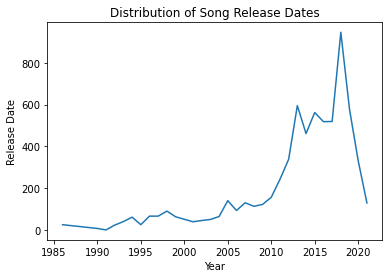

In [61]:
plt.plot(lyrics['Unnamed: 0'].groupby(lyrics.release_date.dt.year).sum());
plt.title('Distribution of Song Release Dates')
plt.xlabel('Year')
plt.ylabel('Release Date');

In [62]:
cv = CountVectorizer(ngram_range=(3,3))

In [63]:
cv.fit(lyrics['lyrics'])

CountVectorizer(ngram_range=(3, 3))

In [64]:
lyricstransformed = cv.fit_transform(lyrics['lyrics'],)

In [65]:
words = pd.DataFrame(lyricstransformed.toarray(),columns=cv.get_feature_names())

In [66]:
words.columns

Index(['000 round my', '007 hit him', '01 my pad', '012 la flame',
       '02 hit the', '02 to burn', '03 greedo don', '03 went from',
       '04 four door', '04 pistons catch',
       ...
       'ねぇ 側においでよ ai', '側においでよ ai explative', '君の愛を 残したい watashi',
       '愛してよ 私を 抱いてよ', '抱いてよ ねぇ 側においでよ', '最後の 記憶に 君の愛を', '残したい watashi no',
       '私の 最後の 記憶に', '私を 抱いてよ ねぇ', '記憶に 君の愛を 残したい'],
      dtype='object', length=523382)

In [67]:
pd.DataFrame(words.sum().sort_values(ascending=False).head(20))

,0
yeah yeah yeah,755
oh oh oh,436
ooh ooh ooh,311
up in the,305
mother explative in,246
you know what,245
mother explative er,240
these explative es,225
don even know,210
in the club,189


In [18]:
plt.barh(y = (pd.DataFrame(words.sum().sort_values(ascending=False).head(20))), width = 1)

NameError: name 'words' is not defined

In [69]:
cv_no_stop = CountVectorizer(stop_words='english')

In [70]:
cv_no_stop.fit(lyrics['lyrics'])

CountVectorizer(stop_words='english')

In [71]:
lyricstransformed_no_stop = cv_no_stop.fit_transform(lyrics['lyrics'],)

In [72]:
words_no_stop = pd.DataFrame(lyricstransformed_no_stop.toarray(),columns=cv_no_stop.get_feature_names())

In [74]:
pd.DataFrame(words_no_stop.sum().sort_values(ascending=False).head(20))

,0
explative,28481
like,9661
yeah,8308
got,7363
don,6928
know,6764
ain,5147
just,4784
love,3188
oh,3102


In [200]:
words['artist_name'] = lyrics['artist'].copy()

In [205]:
words['artist_name']

0                     T.I.
1                     T.I.
2                     T.I.
3                     T.I.
4                     T.I.
               ...        
1580    Tyler, The Creator
1581    Tyler, The Creator
1582    Tyler, The Creator
1583    Tyler, The Creator
1584    Tyler, The Creator
Name: artist_name, Length: 1585, dtype: object

###### words_no_stop['artist_name'] = lyrics['artist'].copy()

In [216]:
words.loc[words['artist_name'] == 'T.I.'].drop(columns = 'artist_name').sum().sum()

8118

In [236]:
words_by_artist_list = []
for name in words['artist_name'].unique():
    words_by_artist_list.append(words.loc[words['artist_name'] == f'{name}'].drop(columns = 'artist_name').sum().sum())

words_by_artist = pd.DataFrame(words_by_artist_list, columns=['unique_words'])

words_by_artist['artist'] = words['artist_name'].unique()

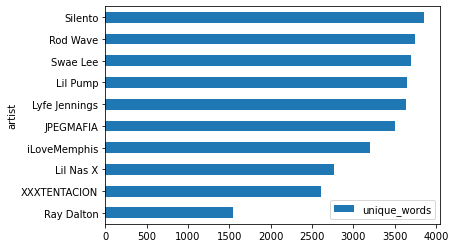

In [277]:
words_by_artist.sort_values(by = 'unique_words').head(10).plot.barh(x = 'artist');

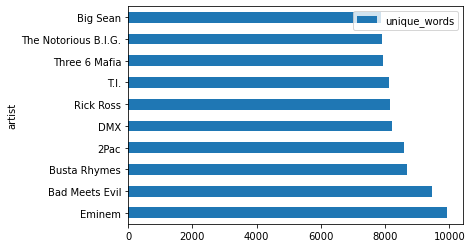

In [280]:
words_by_artist.sort_values(by = 'unique_words',ascending=False).head(10).plot.barh(x = 'artist');

In [169]:
words.shape

(1585, 24344)

In [172]:
words

,000,007,01,012,02,03,04,05,06,061,...,ねぇ,側においでよ,君の愛を,愛してよ,抱いてよ,最後の,残したい,私の,私を,記憶に
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1581,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
lyrics[['artist','lyrics']].to_csv('./data/clean_lyrics.csv')

### Playboi Carti Lyrics

In [105]:
carti = pd.read_csv('./data/carti.csv',)

In [106]:
carti

,lyrics
0,"[Intro: Playboi Carti & Jamie Foxx]\nYo, Pi'er..."
1,"[Intro: Lil Uzi Vert]\nKnow I got a lot, lot\n..."
2,[Intro: Lil Uzi Vert]\nYeah\nNow\nNow is my ti...
3,"[Intro]\nFeel like, bitch, hello, check it out..."
4,[Intro: Playboi Carti]\nGas in my blunt (I can...
5,"[Intro]\n(Blatt)\n\n[Chorus]\nYeah, look at th..."
6,[Intro]\nJust talk shit\nThem pussy niggas ain...
7,"[Intro]\nWhat? What? What? What?\nI'm so high,..."
8,[Intro: Lala Baptiste & Playboi Carti]\nWhat a...
9,[Intro]\nUh (Yeah)\n\n[Chorus]\nWalk around wi...


In [100]:
carti_text = carti['lyrics']

In [107]:
for word in curse_words['2g1c'].unique():
    carti['lyrics'] = carti['lyrics'].str.replace(f'{word}','')

In [111]:
for name in lyrics['artist'].unique():
    carti['lyrics'] = carti['lyrics'].str.replace(f'{name}','')

In [128]:
carti['lyrics'] = carti['lyrics'].str.replace('[', '')
carti['lyrics'] = carti['lyrics'].str.replace('\n',' ')
carti['lyrics'] = carti['lyrics'].str.replace('Intro','')
carti['lyrics'] = carti['lyrics'].str.replace(':','')
carti['lyrics'] = carti['lyrics'].str.replace('Verse','')
carti['lyrics'] = carti['lyrics'].str.replace('Hook','')
carti['lyrics'] = carti['lyrics'].str.replace('Chorus','')
carti['lyrics'] = carti['lyrics'].str.replace('Sample','')
carti['lyrics'] = carti['lyrics'].str.replace('intro','')
carti['lyrics'] = carti['lyrics'].str.replace(',','')
carti['lyrics'] = carti['lyrics'].str.replace(';','')
carti['lyrics'] = carti['lyrics'].str.replace('"','')
carti['lyrics'] = carti['lyrics'].str.replace(']','')
carti['lyrics'] = carti['lyrics'].str.replace('Tyler The Creator','')
carti['lyrics'] = carti['lyrics'].str.replace('Jamie Foxx','')
carti['lyrics'] = carti['lyrics'].str.replace('&','')
carti['lyrics'] = carti['lyrics'].str.replace('(','')
carti['lyrics'] = carti['lyrics'].str.replace(')','')
carti['lyrics'] = carti['lyrics'].str.replace(',','.')
carti['lyrics'] = carti['lyrics'].str.replace('?','.')

In [129]:
for word in curse_words['2g1c'].unique():
    carti['lyrics'] = carti['lyrics'].str.replace(f'{word}','')

In [130]:
carti

,lyrics
0,Yo Pi'erre you wanna come out here. Uh I...
1,Know I got a lot lot I'm a rockstar I'm a ro...
2,Yeah Now Now is my time Now is my time That-...
3,Feel like hello check it out Yeah you know w...
4,Gas in my blunt I can't go in I ain't ready ...
5,Blatt Yeah look at these diamonds they shin...
6,Just talk Them s ain't 'bout that Yeah yea...
7,What. What. What. What. I'm so high man I can...
8,Lala Baptiste What are you talking about. I...
9,Uh Yeah Walk around with them bills hold up...


In [131]:
carti.to_csv('./data/carti_text.txt',header=False)